# Data van 1 file

In [19]:
import pandas as pd
import numpy as np
import matplotlib as plt
pd.options.mode.chained_assignment = None
import glob

In [20]:
data = pd.read_csv('C:/Users/20175848/Documents/waterschap-datachallenge/data/den bosch/sewer_data_db/data_pump_flow/debieten en draaiuren 01012018 - 30042018.csv', sep = ';')
data = data.drop(data.index[0:4])
data = data.reset_index()
data = data.drop(['index'], axis = 1)
data.columns = data.iloc[0]
data = data.drop(data.index[0])
data = data.reset_index()
data = data.drop(['index'], axis = 1)
data['TIJDSTIP'] = pd.to_datetime(data['TIJDSTIP'], format = '%d-%m-%Y (%H:%M uur)')


In [21]:
#data.groupby('LOCATIE').apply(lambda x: x.sort_values(['TIJDSTIP']))
#debiet = data[data['MEETPUNT'] == 'Debiet ']
data2 = data.groupby(['LOCATIE', 'MEETPUNT'])

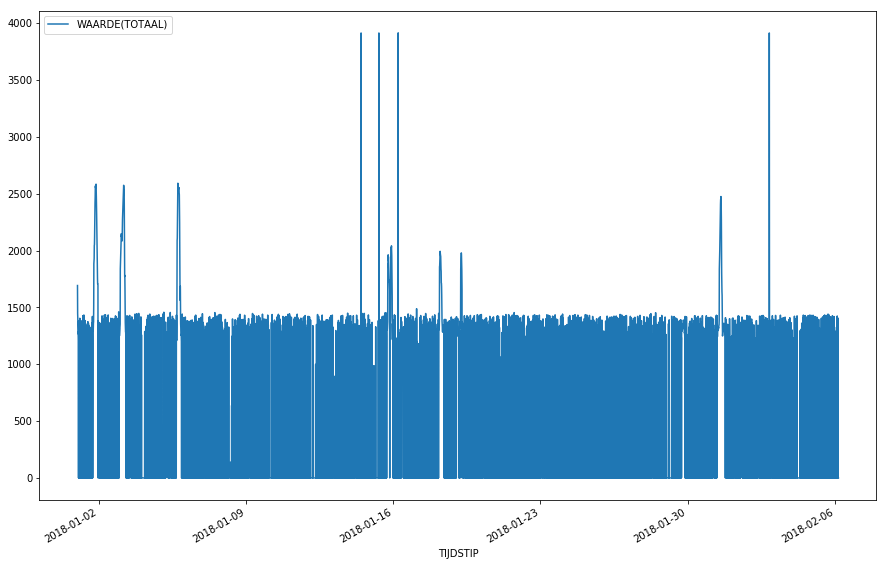

In [22]:
for i, df in data2:
    if df['MEETPUNT'].all() == 'Debiet ':
        df['WAARDE(TOTAAL)'] = df['WAARDE(TOTAAL)'].astype(int)
        df.plot(x= 'TIJDSTIP', y = 'WAARDE(TOTAAL)', figsize=(15,10))

# Data van alle files

In [43]:
path = 'C:/Users/20175848/Documents/waterschap-datachallenge/data/den bosch/sewer_data_db/data_pump_flow/'
all_files = glob.glob(path + '/*.csv')
data = pd.DataFrame()
for filename in all_files:
    temp = pd.read_csv(filename, sep = ';')
    temp = temp.drop(temp.index[0:4])
    data = pd.concat([data, temp])

data = data.reset_index()
data = data.drop(['index'], axis = 1)
data.columns = data.iloc[0]
data = data.drop(data.index[0])
data = data.reset_index()
data = data.drop(['index'], axis = 1)
data = data[data['LOCATIE'] != 'LOCATIE']
data['TIJDSTIP'] = pd.to_datetime(data['TIJDSTIP'], format = '%d-%m-%Y (%H:%M uur)')



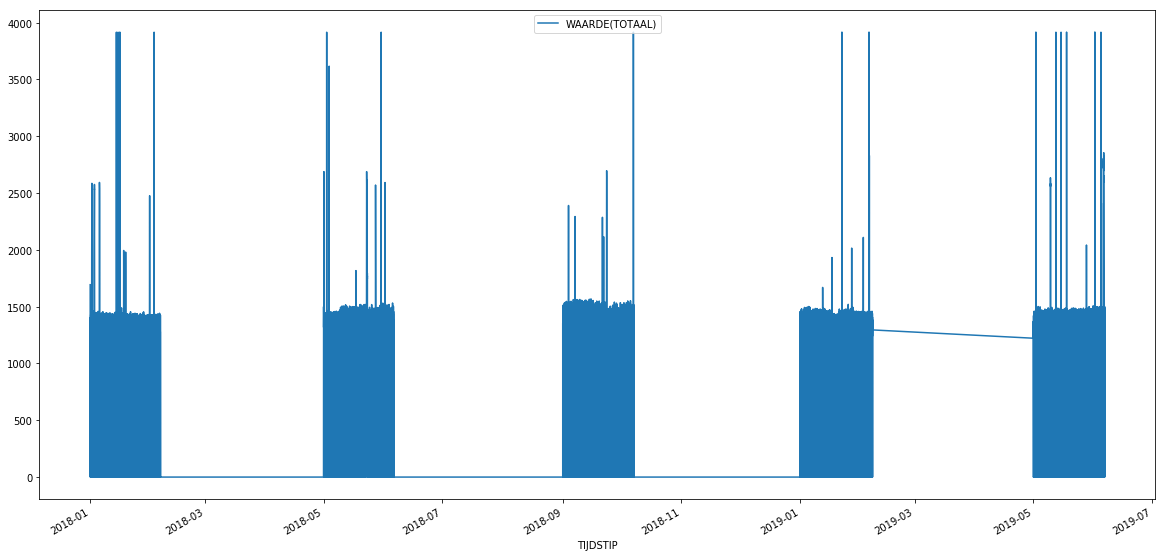

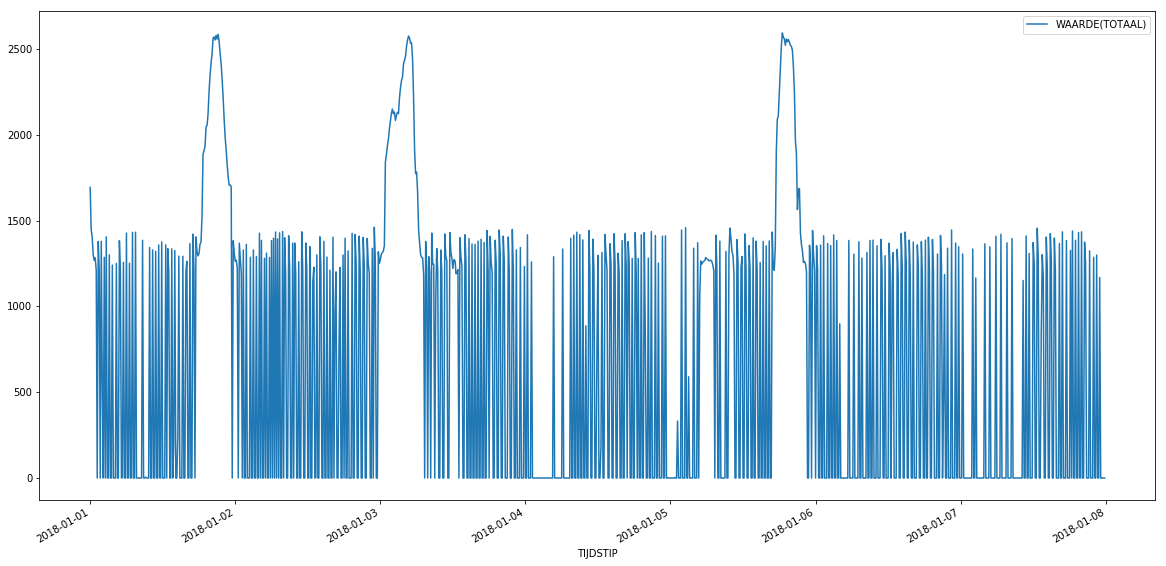

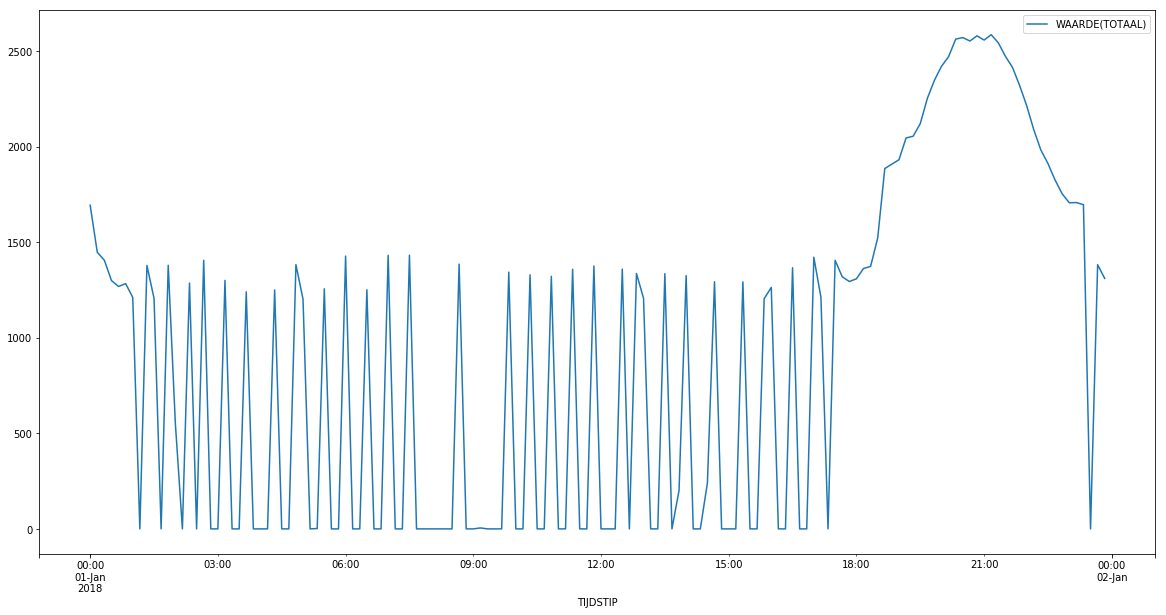

In [62]:
data2 = data.groupby(['LOCATIE', 'MEETPUNT'])
for i, df in data2:
    if df['MEETPUNT'].all() == 'Debiet ':
        df['WAARDE(TOTAAL)'] = df['WAARDE(TOTAAL)'].astype(int)
        df.plot(x= 'TIJDSTIP', y = 'WAARDE(TOTAAL)', figsize=(20,10))
        
        week = df[df['TIJDSTIP'].dt.week == 1]
        week = week[week['TIJDSTIP'].dt.year == 2018]
        week.plot(x= 'TIJDSTIP', y = 'WAARDE(TOTAAL)', figsize=(20,10))
        
        day = day[day['TIJDSTIP'].dt.year == 2018]
        day = day[day['TIJDSTIP'].dt.day == 1]
        day = day[day['TIJDSTIP'].dt.month == 1]
        day.plot(x= 'TIJDSTIP', y = 'WAARDE(TOTAAL)', figsize=(20,10))        
